### Diamond Price Prediction
- Introduction About the Data :
    - The dataset The goal is to predict price of given diamond (Regression Analysis).

### There are 10 independent variables (including id):

- id : unique identifier of each diamond
- carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
- cut : Quality of Diamond Cut
- color : Color of Diamond
- clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics - under 10-power magnification.
- depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top 
          surface)
- table : A diamond's table is the facet which can be seen when the stone is viewed face up.
      - x : Diamond X dimension
      - y : Diamond Y dimension
      - x : Diamond Z dimension

### Target variable:

-  price: Price of the given Diamond.


In [3]:
import pandas as pd

In [4]:
## Data Ingestion Step : We read a data 
pd.read_csv('data/gemstone.csv')

,id,scarat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [5]:
df=pd.read_csv('data/gemstone.csv')
df.head()

,id,scarat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [6]:
## Find Missing value
df.isnull().sum()

id         0
scarat     0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### No missing value in Data

In [7]:
##Check integer of floating data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   scarat   193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [8]:
## categorical variable  
df.head()

,id,scarat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [9]:
## Lets drop the id column
df=df.drop(labels=['id'],axis=1)
df.head()
 

,scarat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


## segregare numerical and categorical column ###
- https://datascience.stackexchange.com/questions/98137/separate-numerical-and-categorical-variables

In [10]:
## Change for duplicate records :
df.duplicated().sum()

0

In [11]:

numerical_columns = df.columns[df.dtypes!='object'] 
categorical_columns = df.columns[df.dtypes=='object'] 
print('Numerical columns:',numerical_columns)
print('Categorical_columns:',categorical_columns)

Numerical columns: Index(['scarat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical_columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [12]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [13]:
## what are the types of categories :
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [14]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [15]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

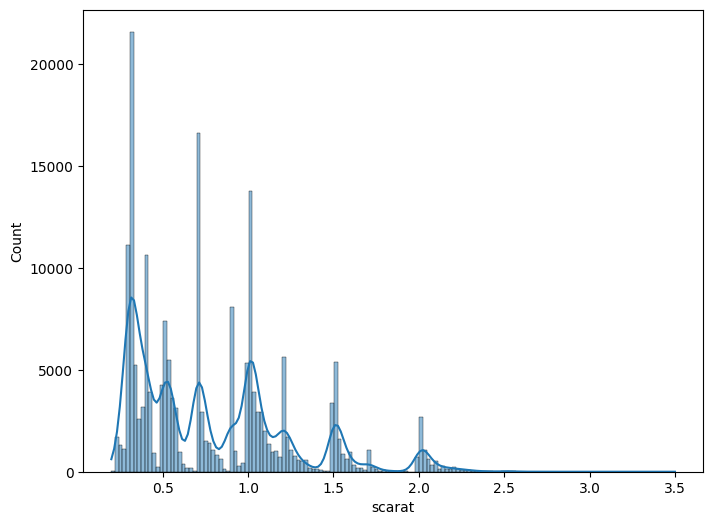

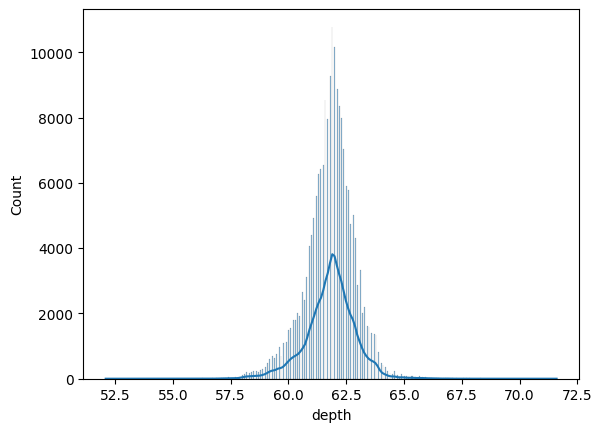

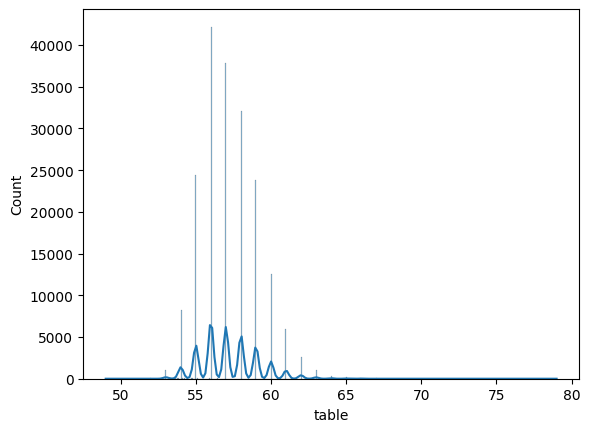

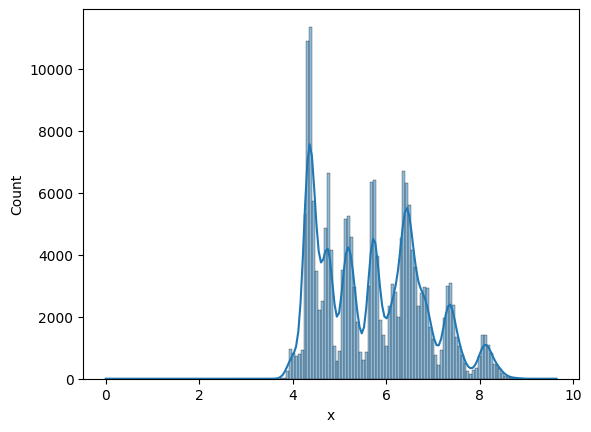

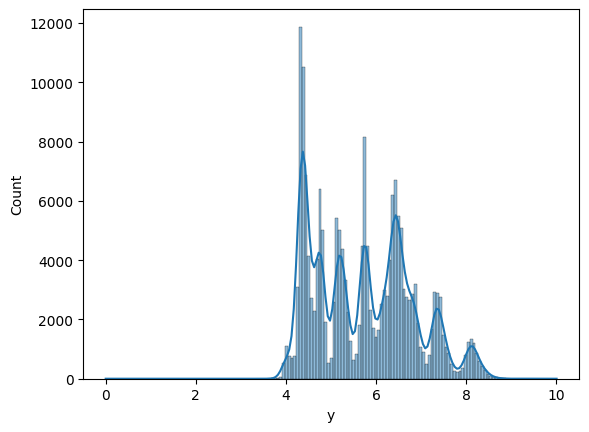

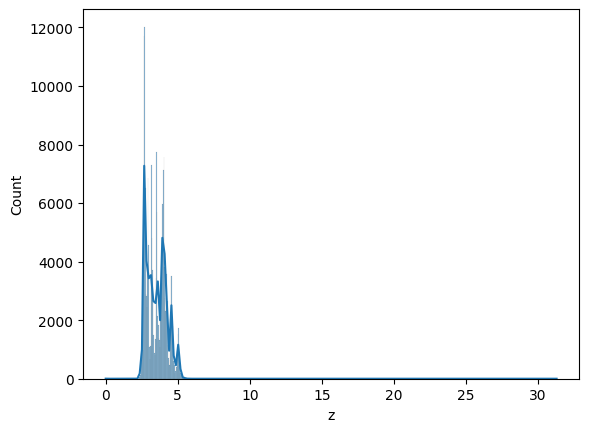

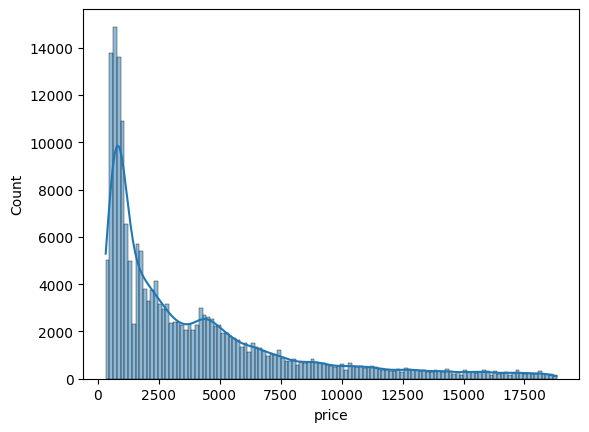

In [16]:
## for numerical data:
### https://m.tutorialspoint.com/seaborn/seaborn_histplot_method.htm

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()      

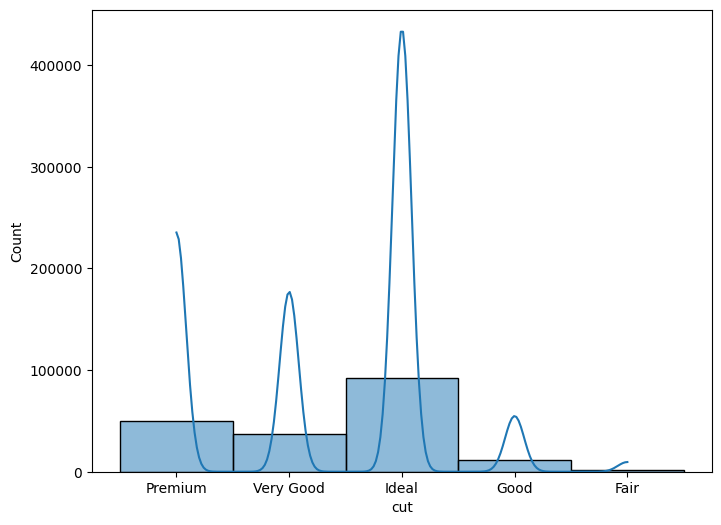

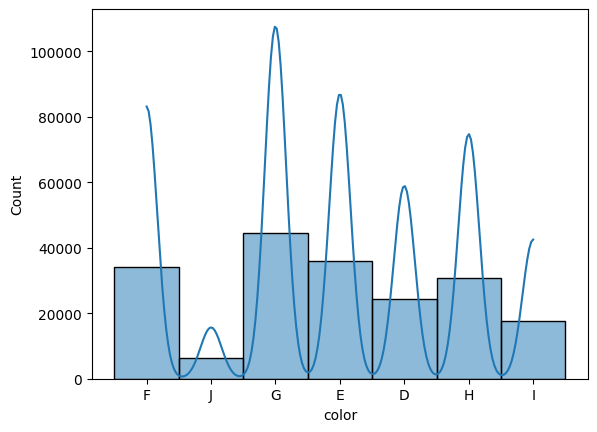

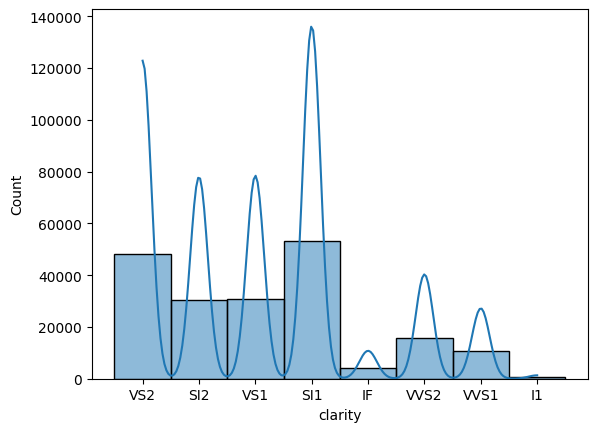

In [17]:
## Do the same for categorical data:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in categorical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [18]:
## correlation

# sns.heatmap(df.corr(),annot=True)

- 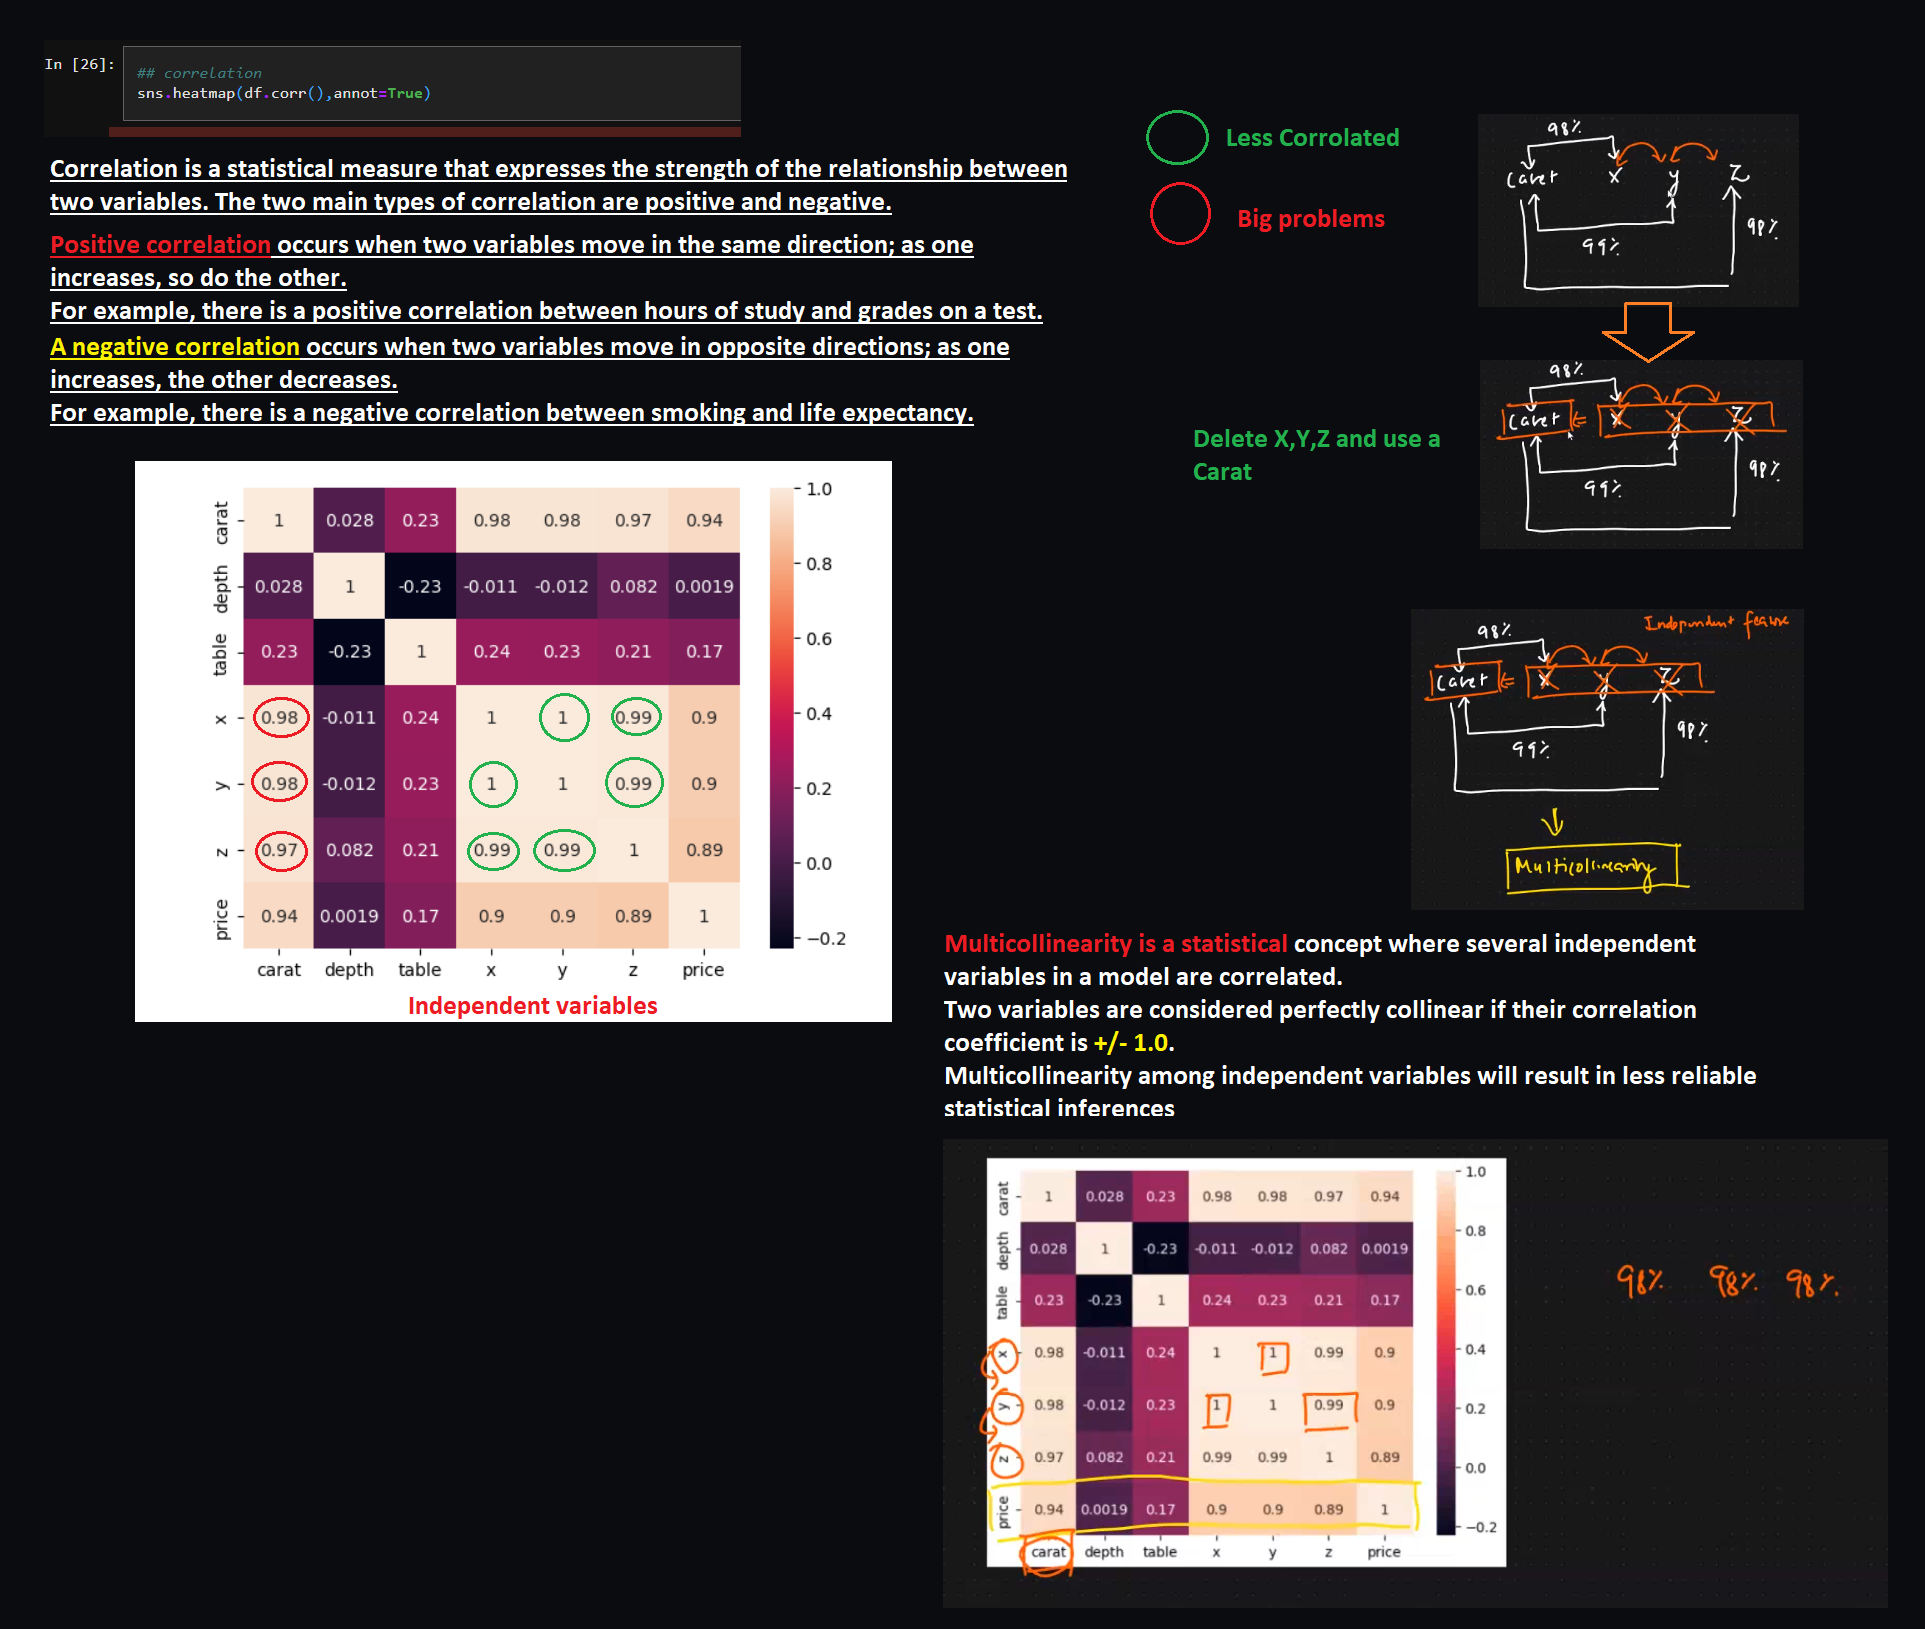

In [19]:
##Currently we will not execute this
## df.drop(labels=['x','y','z'],axis=1)


In [20]:
### https://www.geeksforgeeks.org/python-seaborn-pairplot-method/
### The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. 
### This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure.

## sns.pairplot(df)


In [21]:
## https://towardsdatascience.com/feature-engineering-ordinal-variables-bfea697f5eee

## ordinal features :

df.head()

,scarat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


- 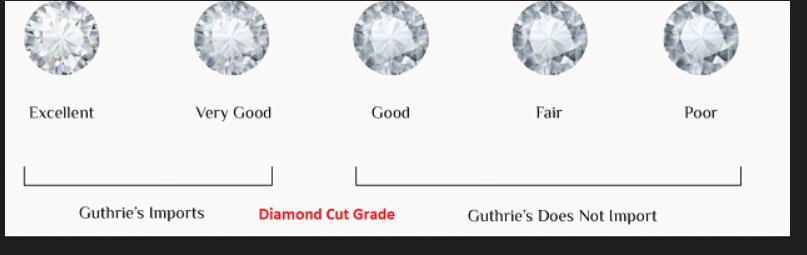

In [22]:
df['cut'].unique()    

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [23]:
cut_map={'Fair':1,'Good':2,'Ideal':3,'Very Good':4,'Premium':5}

In [24]:
df['clarity'].unique()  

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [25]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [26]:
df['color'].unique() 

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [27]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

### Map Python:

- Python's map() is a built-in function that allows you to process and transform all the items in an iterable without using an explicit for loop, a technique commonly known as 
  - mapping. map() is useful when you need to apply a transformation function to each item in an iterable and transform them into a new iterable.

In [28]:
df['cut']=df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [29]:
df.head()

,scarat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,5,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,4,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,3,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,3,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,5,4,4,62.6,59.0,7.65,7.61,4.77,14453
